<a href="https://colab.research.google.com/github/Dieubang8177/my-porfolio/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# Đọc dữ liệu từ file csv
df = pd.read_csv('AMD.csv')

# Hiển thị thông tin dữ liệu
print(df.info())

# Hiển thị thống kê mô tả
df['Date'] = pd.to_datetime(df['Date'])
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10671 entries, 0 to 10670
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10671 non-null  object 
 1   Open          10671 non-null  float64
 2   High          10671 non-null  float64
 3   Low           10671 non-null  float64
 4   Close         10671 non-null  float64
 5   Volume        10671 non-null  int64  
 6   Dividends     10671 non-null  int64  
 7   Stock Splits  10671 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 667.1+ KB
None
                                Date          Open          High  \
count                          10671  10671.000000  10671.000000   
mean   2001-05-05 02:21:41.546246912     15.258008     15.899003   
min              1980-03-17 00:00:00      0.000000      1.690000   
25%              1990-10-03 12:00:00      4.850000      5.311250   
50%              2001-04-26 00:00:00      9.562500   

TRUNG BÌNH ĐỘNG (MOVING AVERAGE)

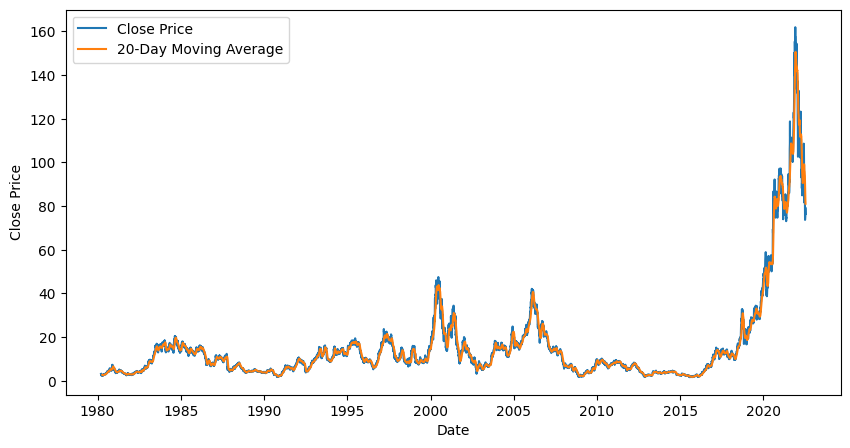

In [ ]:
import matplotlib.pyplot as plt

# Tính trung bình động 20 ngày cho cột 'Close'
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Vẽ biểu đồ
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA_20'], label='20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Chọn cột 'Close' làm dữ liệu
data = df['Close'].values

# Xây dựng mô hình ARIMA
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()

# Dự báo 10 bước
forecast = model_fit.forecast(steps=10)

print("Dự báo 10 bước tiếp theo:", forecast)


Dự báo 10 bước tiếp theo: [76.51465626 76.38587774 76.32251013 76.36541508 76.37628617 76.36772378
 76.37007709 76.37253421 76.37157383 76.37123462]


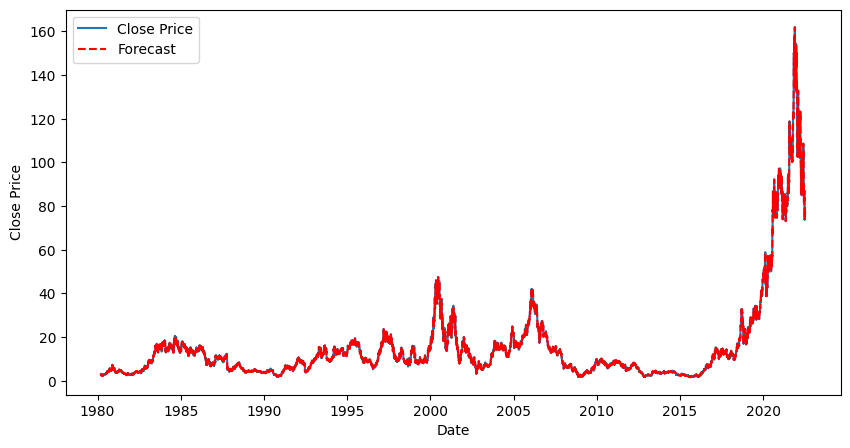

In [ ]:

from statsmodels.tsa.arima.model import ARIMA

# Giả sử df là DataFrame đã được cung cấp trước đó
# Chọn cột 'Close' làm dữ liệu
data = df['Close'].values

# Xây dựng mô hình ARIMA
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()

# Dự báo 10 bước
forecast = model_fit.forecast(steps=10)

# Tạo chuỗi thời gian cho dự báo
last_date = df['Date'].iloc[-1]
forecast_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 11)]

# Vẽ biểu đồ
plt.figure(figsize=(10,5))
plt.plot(df['Date'], data, label='Close Price')
plt.plot(pd.concat([df['Date'], pd.Series(forecast_dates)]).reset_index(drop=True),
         np.concatenate([data, forecast]), label='Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


TIỀN XỬ LÍ DỮ LIỆU

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Chọn cột 'Close' làm dữ liệu
data = df['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Chuẩn bị dữ liệu cho mô hình RNN
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Định hình lại dữ liệu để phù hợp với đầu vào của RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


XÂY DỰNG VÀ TRAIN MÔ HÌNH

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Chuẩn bị dữ liệu
time_step = 10  # ví dụ về kích thước time_step
data = np.sin(np.linspace(0, 100, 10000))  # dữ liệu giả định
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

X = []
y = []

for i in range(len(scaled_data) - time_step - 1):
    X.append(scaled_data[i:(i + time_step), 0])
    y.append(scaled_data[i + time_step, 0])

X = np.array(X)
y = np.array(y)

# Chia dữ liệu thành train và test
train_size = int(len(X) * 0.8)
val_size = int(train_size * 0.2)  # 20% của dữ liệu train sẽ được sử dụng cho validation
test_size = len(X) - (train_size + val_size)
X_train, X_val, X_test = X[:train_size], X[train_size:(train_size + val_size)], X[(train_size + val_size):]
y_train, y_val, y_test = y[:train_size], y[train_size:(train_size + val_size)], y[(train_size + val_size):]


# Định dạng lại dữ liệu để phù hợp với yêu cầu của LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình RNN
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=1, epochs=20)

# Dự báo
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Chuyển đổi dữ liệu về dạng ban đầu
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# In kết quả dự đoán (ví dụ)
print("Train Predictions:", train_predict)
print("Test Predictions:", test_predict)

Epoch 1/20
7991/7991 [==============================] - 80s 10ms/step - loss: 9.2598e-04 - val_loss: 5.4816e-05
Epoch 2/20
7991/7991 [==============================] - 72s 9ms/step - loss: 1.0788e-04 - val_loss: 5.4010e-06
Epoch 3/20
7991/7991 [==============================] - 73s 9ms/step - loss: 7.4150e-05 - val_loss: 6.7203e-06
Epoch 4/20
7991/7991 [==============================] - 87s 11ms/step - loss: 5.3587e-05 - val_loss: 1.0392e-06
Epoch 5/20
7991/7991 [==============================] - 71s 9ms/step - loss: 5.0361e-05 - val_loss: 3.8960e-04
Epoch 6/20
7991/7991 [==============================] - 66s 8ms/step - loss: 4.5006e-05 - val_loss: 1.4897e-04
Epoch 7/20
7991/7991 [==============================] - 65s 8ms/step - loss: 2.7671e-05 - val_loss: 8.9491e-08
Epoch 8/20
7991/7991 [==============================] - 68s 9ms/step - loss: 2.9998e-05 - val_loss: 6.0286e-07
Epoch 9/20
7991/7991 [==============================] - 63s 8ms/step - loss: 3.4251e-05 - val_loss: 2.0161e-06

VẼ BIỂU ĐỒ THỂ HIỆN KẾT QUẢ DỰ BÁO

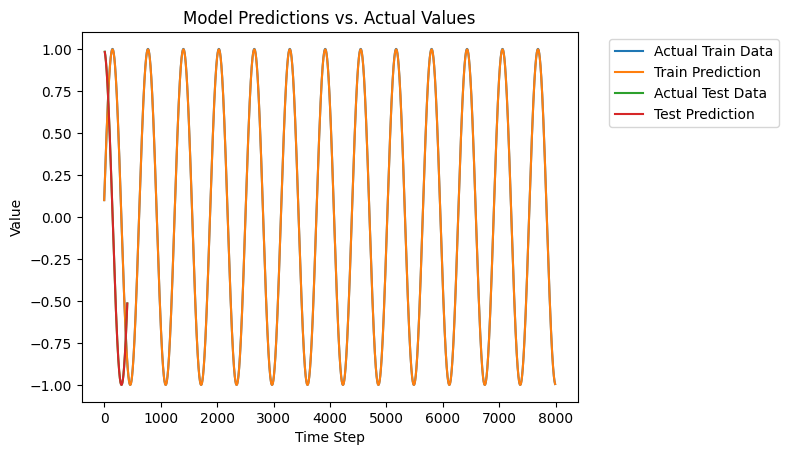

In [ ]:

# Invert scaling for actual values (optional, if you have them)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted values
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Actual Train Data')
plt.plot(np.arange(len(train_predict)), train_predict, label='Train Prediction')

plt.plot(np.arange(len(y_test_inv)) + time_step, y_test_inv, label='Actual Test Data')
plt.plot(np.arange(len(test_predict)) + time_step, test_predict, label='Test Prediction')

# Set labels and title
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Model Predictions vs. Actual Values')

# Add legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust location as needed

# Show plot
plt.show()


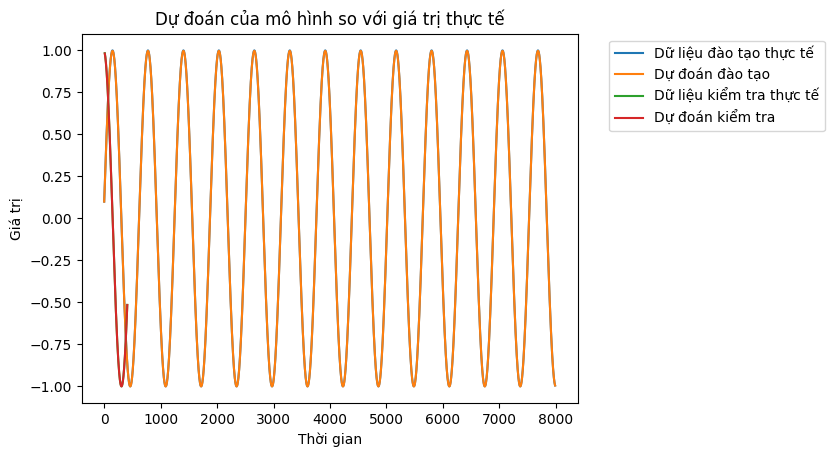

In [ ]:
# Đảo ngược việc chuẩn hóa cho giá trị thực
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Vẽ biểu đồ giá trị thực và giá trị dự đoán
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Dữ liệu đào tạo thực tế')
plt.plot(np.arange(len(train_predict)), train_predict, label='Dự đoán đào tạo')

plt.plot(np.arange(len(y_test_inv)) + time_step, y_test_inv, label='Dữ liệu kiểm tra thực tế')
plt.plot(np.arange(len(test_predict)) + time_step, test_predict, label='Dự đoán kiểm tra')

# Đặt nhãn và tiêu đề
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.title('Dự đoán của mô hình so với giá trị thực tế')

# Thêm chú thích bên ngoài biểu đồ
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Điều chỉnh vị trí nếu cần

# Hiển thị biểu đồ
plt.show()


ĐÁNH GIÁ MÔ HÌNH

In [ ]:
#đánh giá mô hình
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')


Training RMSE: 0.001319136693394638
Testing RMSE: 0.0010830369008601565


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import datetime

# Chuẩn bị dữ liệu giả định và mô hình đã huấn luyện (như trong đoạn code của bạn)
time_step = 10  # ví dụ về kích thước time_step
data = np.sin(np.linspace(0, 100, 10000))  # dữ liệu giả định
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

# Xây dựng và huấn luyện mô hình (như trong đoạn code của bạn)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Chuẩn bị dữ liệu cho huấn luyện và kiểm tra
X = []
y = []
for i in range(len(scaled_data) - time_step - 1):
    X.append(scaled_data[i:(i + time_step), 0])
    y.append(scaled_data[i + time_step, 0])
X = np.array(X)
y = np.array(y)

# Chia dữ liệu thành train và test
train_size = int(len(X) * 0.8)
val_size = int(train_size * 0.2)
test_size = len(X) - (train_size + val_size)
X_train, X_val, X_test = X[:train_size], X[train_size:(train_size + val_size)], X[(train_size + val_size):]
y_train, y_val, y_test = y[:train_size], y[train_size:(train_size + val_size)], y[(train_size + val_size):]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))



In [ ]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=1, epochs=20)



Epoch 1/20
7991/7991 [==============================] - 74s 9ms/step - loss: 7.5868e-04 - val_loss: 4.9591e-05
Epoch 2/20
7991/7991 [==============================] - 66s 8ms/step - loss: 9.0121e-05 - val_loss: 1.3907e-05
Epoch 3/20
7991/7991 [==============================] - 65s 8ms/step - loss: 6.0567e-05 - val_loss: 3.1665e-07
Epoch 4/20
7991/7991 [==============================] - 66s 8ms/step - loss: 6.3359e-05 - val_loss: 1.2087e-07
Epoch 5/20
7991/7991 [==============================] - 65s 8ms/step - loss: 4.1603e-05 - val_loss: 1.4122e-06
Epoch 6/20
7991/7991 [==============================] - 64s 8ms/step - loss: 4.1648e-05 - val_loss: 3.9317e-06
Epoch 7/20
7991/7991 [==============================] - 65s 8ms/step - loss: 3.0047e-05 - val_loss: 2.3382e-05
Epoch 8/20
7991/7991 [==============================] - 76s 10ms/step - loss: 3.0927e-05 - val_loss: 3.9183e-05
Epoch 9/20
7991/7991 [==============================] - 76s 9ms/step - loss: 4.1309e-05 - val_loss: 8.6533e-07


In [16]:
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler

# Hàm để dự đoán giá trị Close cho một ngày cụ thể trong tương lai
def predict_future_close(last_known_data, days_in_future, time_step, model, scaler):
    predicted_values = []
    current_input = last_known_data[-time_step:].reshape(1, time_step, 1)

    for _ in range(days_in_future):
        # Dự đoán giá trị tiếp theo
        next_pred = model.predict(current_input)

        # Lưu giá trị dự đoán
        predicted_values.append(next_pred[0, 0])

        # Chuẩn bị input cho lần dự đoán tiếp theo
        next_pred_scaled = next_pred.reshape(1, 1, 1)

        # Append the reshaped next_pred_scaled to current_input
        current_input = np.append(current_input[:, 1:, :], next_pred_scaled, axis=1)

    predicted_values = np.array(predicted_values).reshape(-1, 1)
    predicted_values = scaler.inverse_transform(predicted_values)

    return predicted_values

# Hàm để chuyển đổi ngày thành số ngày từ 1/1/1970
def days_since_epoch(date):
    return (date - datetime.datetime(1970, 1, 1)).days

# Giả định dữ liệu của bạn kéo dài đến một ngày cụ thể, ví dụ, 31/12/2022
last_date_in_data = datetime.datetime(2022, 12, 31)

# Giả định rằng scaled_data chứa dữ liệu đã được scale và time_step đã được định nghĩa
# Bạn cần phải có model và scaler đã được đào tạo và khởi tạo từ trước

while True:
    # Nhập ngày, tháng, năm từ người dùng
    day = int(input("Nhập ngày: "))
    month = int(input("Nhập tháng: "))
    year = int(input("Nhập năm: "))

    # Tạo đối tượng datetime từ ngày, tháng, năm
    predict_date = datetime.datetime(year, month, day)

    days_in_future = days_since_epoch(predict_date) - days_since_epoch(last_date_in_data)

    if days_in_future < 0:
        print("Ngày nhập vào phải sau ngày 31/12/2022.")
    else:
        # Dự đoán giá trị Close cho ngày người dùng nhập
        last_known_data = scaled_data[-time_step:]  # Lấy time_step giá trị cuối cùng của dữ liệu
        predicted_close = predict_future_close(last_known_data, days_in_future, time_step, model, scaler)

        # In kết quả dự đoán
        print(f"Giá trị Close dự đoán cho ngày {predict_date.strftime('%Y-%m-%d')} là: {predicted_close[-1][0]}")

    # Hỏi người dùng có muốn tiếp tục dự đoán hay không
    cont = input("Bạn có muốn dự đoán tiếp không? (c/k): ").lower()
    if cont != 'c':
        break

print("Chương trình kết thúc.")


Nhập ngày: 01
Nhập tháng: 01
Nhập năm: 2023
1/1 [==============================] - 0s 25ms/step
Giá trị Close dự đoán cho ngày 2023-01-01 là: -0.4936582148075104
Bạn có muốn dự đoán tiếp không? (c/k): c
Nhập ngày: 02
Nhập tháng: 01
Nhập năm: 2023
1/1 [==============================] - 0s 20ms/step
Giá trị Close dự đoán cho ngày 2023-01-02 là: -0.48164430260658264
Bạn có muốn dự đoán tiếp không? (c/k): c
Nhập ngày: 03
Nhập tháng: 01
Nhập năm: 2023
1/1 [==============================] - 0s 33ms/step
Giá trị Close dự đoán cho ngày 2023-01-03 là: -0.46790066361427307
Bạn có muốn dự đoán tiếp không? (c/k): k
Chương trình kết thúc.
